## **ASSIGNMENT 2: CONVOLUTION**



### **Loading dataset from kaggle**

In [2]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

Saving kaggle.json to kaggle.json
100% 810M/812M [00:37<00:00, 24.4MB/s]
100% 812M/812M [00:37<00:00, 22.7MB/s]


### **Q1.Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?**

**Making samples from data for training of 1000,test of 500 and validation of 500**

In [3]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("trainset", start_index=0, end_index=1000)
make_subset("validationset", start_index=1000, end_index=1500)
make_subset("testset", start_index=1500, end_index=2000)

**Building the model**

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

input_org = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(input_org)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
output_org = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=input_org, outputs=output_org)

In [35]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

**Configuring the model for training**

In [36]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
    new_base_dir / "trainset",
    image_size=(180, 180),
    batch_size=32)
validation_data = image_dataset_from_directory(
    new_base_dir / "validationset",
    image_size=(180, 180),
    batch_size=32)
test_data = image_dataset_from_directory(
    new_base_dir / "testset",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
import numpy as np
import tensorflow as tf
randomnumbers = np.random.normal(size=(1000, 16))
data1 = tf.data.Dataset.from_tensor_slices(randomnumbers)

In [ ]:
for i, element in enumerate(data1):
    print(element.shape)
    if i >= 2:
        break

In [7]:
batch_data = data1.batch(32)
for i, element in enumerate(batch_data):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [8]:
for data_batch, labels_batch in train_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model**

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_data,
    epochs=30,
    validation_data=validation_data,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 19ms/step - loss: 0.7277 - accuracy: 0.5245 - val_loss: 1.7586 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 17ms/step - loss: 0.7182 - accuracy: 0.5290 - val_loss: 0.6926 - val_accuracy: 0.5010
Epoch 3/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6874 - accuracy: 0.5265 - val_loss: 0.6775 - val_accuracy: 0.5640
Epoch 4/30
63/63 [==============================] - 1s 15ms/step - loss: 0.6625 - accuracy: 0.6255 - val_loss: 0.8268 - val_accuracy: 0.5150
Epoch 5/30
63/63 [==============================] - 1s 16ms/step - loss: 0.6196 - accuracy: 0.6520 - val_loss: 0.6249 - val_accuracy: 0.6140
Epoch 6/30
63/63 [==============================] - 1s 15ms/step - loss: 0.5864 - accuracy: 0.6910 - val_loss: 0.7637 - val_accuracy: 0.6100
Epoch 7/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5641 - accuracy: 0.7110 - val_loss: 0.6118 - val_accuracy: 0.6450
Epoch 8/30
63

**Displaying curves of accuracy and loss**

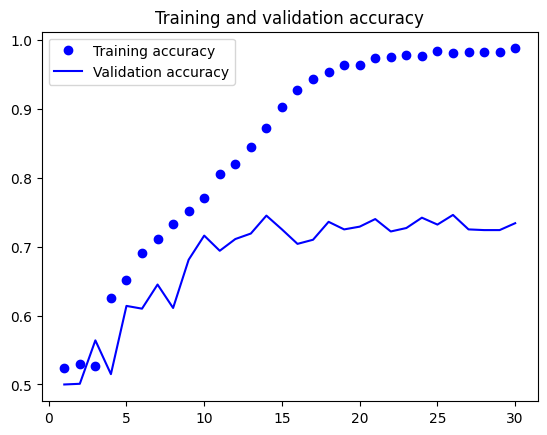

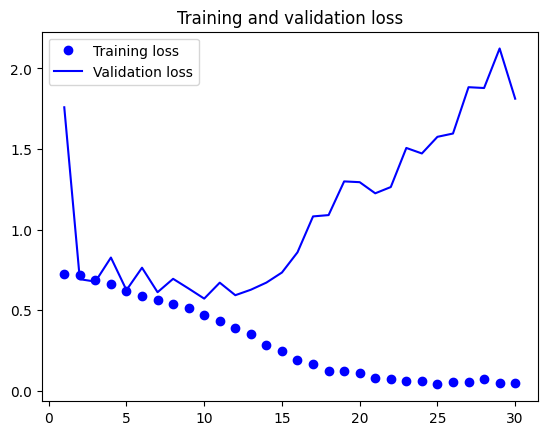

In [38]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [39]:
test_accuracyorg = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_accuracyorg.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.6179 - accuracy: 0.7000
Test accuracy: 0.700


### **The test accuracy of the model is 70% without regularization**

### **Using Dropout regularization technique to reduce overfitting and improve performance**

**Configuring the model for training**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

input_sample = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(input_sample)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
output_sample = layers.Dense(1, activation="sigmoid")(x)
model_1 = keras.Model(inputs=input_sample, outputs=output_sample)

In [11]:
model_1.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model_1.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks1)

Epoch 1/20
63/63 [==============================] - 9s 32ms/step - loss: 0.6957 - accuracy: 0.4955 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 0.6779 - accuracy: 0.5745 - val_loss: 0.8783 - val_accuracy: 0.5040
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6704 - accuracy: 0.5925 - val_loss: 0.6475 - val_accuracy: 0.6230
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6283 - accuracy: 0.6395 - val_loss: 0.6213 - val_accuracy: 0.6390
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 0.5842 - accuracy: 0.6900 - val_loss: 0.5824 - val_accuracy: 0.7030
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.5599 - accuracy: 0.7155 - val_loss: 0.5562 - val_accuracy: 0.7210
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.5411 - accuracy: 0.7295 - val_loss: 0.6350 - val_accuracy: 0.6830
Epoch 8/20
63

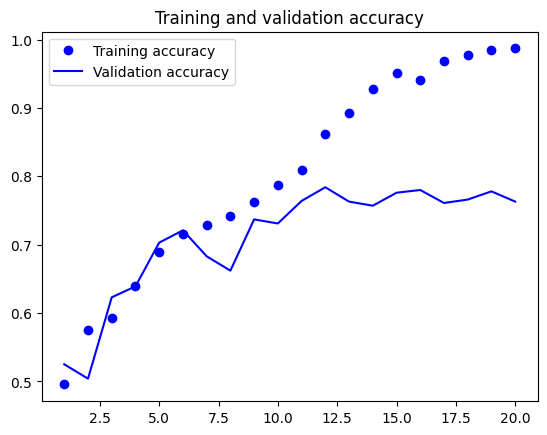

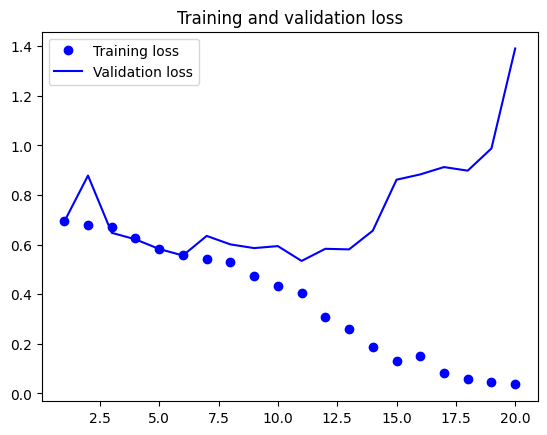

In [14]:
import matplotlib.pyplot as plt
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
test_accuracy1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_accuracy1.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.5938 - accuracy: 0.7380
Test accuracy: 0.738


### **The test accuracy of the model is 73% with dropout regularization which means the performance has increased **

### **Q2.Increase your training sample size. You may pick any amount. Keep the validation andtest samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?**###

**Let's increase the size of the trainning sample to 2000 from 1000 and evaluating the model's performance**

In [99]:
make_subset("train_22", start_index=1000, end_index=3000)

train_dataset2 = image_dataset_from_directory(
    new_base_dir / "train_22",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.


**Using Data Augmentation**

In [100]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying Training augmented sample pictures**

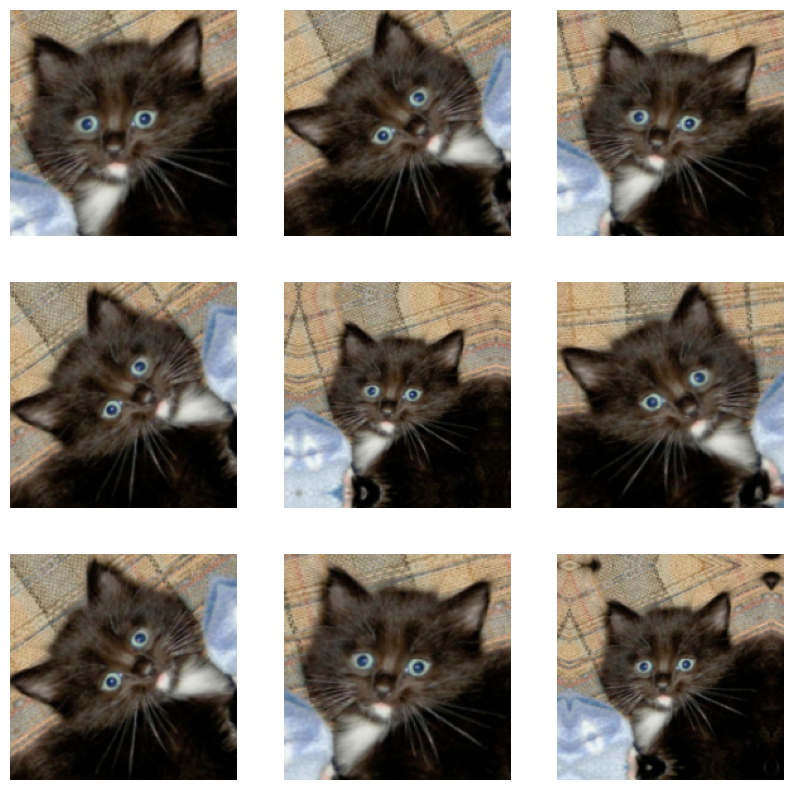

In [101]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_samples = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_samples[0].numpy().astype("uint8"))
        plt.axis("off")

**Creating a convolutional network with data augmentation and dropout**

In [102]:
input_1 = keras.Input(shape=(180, 180, 3))
x = data_augmentation(input_1)
x = layers.Rescaling(1./255)(x)


x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',strides=(1,1))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same',strides=(1,1))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same',strides=(1,1))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same',strides=(1,1))(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same',strides=(1,1))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)

output_1 = layers.Dense(1, activation="sigmoid")(x)
model_2 = keras.Model(inputs=input_1, outputs=output_1)

model_2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [103]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model_2.fit(
    train_dataset2,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks1)

Epoch 1/20
125/125 [==============================] - 4s 17ms/step - loss: 0.7446 - accuracy: 0.5192 - val_loss: 0.6917 - val_accuracy: 0.5400
Epoch 2/20
125/125 [==============================] - 2s 16ms/step - loss: 0.6940 - accuracy: 0.5380 - val_loss: 0.6803 - val_accuracy: 0.6430
Epoch 3/20
125/125 [==============================] - 2s 16ms/step - loss: 0.6774 - accuracy: 0.5790 - val_loss: 0.6455 - val_accuracy: 0.6550
Epoch 4/20
125/125 [==============================] - 2s 16ms/step - loss: 0.6404 - accuracy: 0.6360 - val_loss: 0.6066 - val_accuracy: 0.6660
Epoch 5/20
125/125 [==============================] - 2s 16ms/step - loss: 0.6244 - accuracy: 0.6543 - val_loss: 0.5485 - val_accuracy: 0.7150
Epoch 6/20
125/125 [==============================] - 2s 15ms/step - loss: 0.6077 - accuracy: 0.6712 - val_loss: 0.5569 - val_accuracy: 0.7110
Epoch 7/20
125/125 [==============================] - 2s 16ms/step - loss: 0.5849 - accuracy: 0.6938 - val_loss: 0.4997 - val_accuracy: 0.7510

In [104]:
test_accuracy2 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_accuracy2.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.3427 - accuracy: 0.8520
Test accuracy: 0.852


**We can see that the test accuracy is 85% which is more than the previous training sample model with 1000 samples**

**Q3.Now change your training sample so that you achieve better performance than those
from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous
steps. The objective is to find the ideal training sample size to get best prediction
results.**

**Let's increase our training sample from 2000 to 5000 and evaluate the model's performance**

In [94]:
make_subset("train3", start_index=1000, end_index=6000)

train_dataset3 = image_dataset_from_directory(
    new_base_dir / "train3",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.


**New convolutional network with increased training samples**

In [95]:
input_2 = keras.Input(shape=(180, 180, 3))
x = data_augmentation(input_2)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output_2 = layers.Dense(1, activation="sigmoid")(x)
model_3 = keras.Model(inputs=input_2, outputs=output_2)

model_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [96]:
callbacks2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model_3.fit(
    train_dataset3,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks2)

Epoch 1/20
313/313 [==============================] - 7s 16ms/step - loss: 0.6948 - accuracy: 0.5270 - val_loss: 0.6783 - val_accuracy: 0.5040
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 0.6518 - accuracy: 0.6264 - val_loss: 0.5921 - val_accuracy: 0.6790
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 0.6047 - accuracy: 0.6761 - val_loss: 0.5915 - val_accuracy: 0.6800
Epoch 4/20
313/313 [==============================] - 4s 14ms/step - loss: 0.5648 - accuracy: 0.7107 - val_loss: 0.5271 - val_accuracy: 0.7470
Epoch 5/20
313/313 [==============================] - 4s 14ms/step - loss: 0.5300 - accuracy: 0.7426 - val_loss: 0.4613 - val_accuracy: 0.7960
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.5021 - accuracy: 0.7561 - val_loss: 0.5226 - val_accuracy: 0.7370
Epoch 7/20
313/313 [==============================] - 4s 14ms/step - loss: 0.4751 - accuracy: 0.7780 - val_loss: 0.4409 - val_accuracy: 0.7930

In [97]:
test_accuracy3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_accuracy3.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 8ms/step - loss: 0.1953 - accuracy: 0.9160
Test accuracy: 0.916


**There is an increase in test accuracy of 91% from 85% with increase in training samples**

### **Q4.Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**

**Installing and freezing the VGG16 convolution base network**

In [105]:
base_network  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [106]:
base_network.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [123]:
base_network  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [124]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.5),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])


In [126]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
   train_data,
   epochs=20,
   validation_data=validation_data,
   callbacks=callbacks)


Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6214 - accuracy: 0.6545 - val_loss: 0.5940 - val_accuracy: 0.6700
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6088 - accuracy: 0.6760 - val_loss: 0.5823 - val_accuracy: 0.6890
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6239 - accuracy: 0.6510 - val_loss: 0.5811 - val_accuracy: 0.6810
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6074 - accuracy: 0.6755 - val_loss: 0.5944 - val_accuracy: 0.6910
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6129 - accuracy: 0.6710 - val_loss: 0.5850 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.5940 - accuracy: 0.6660 - val_loss: 0.5778 - val_accuracy: 0.7050
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6133 - accuracy: 0.6650 - val_loss: 0.6788 - val_accuracy: 0.5710
Epoch 8/20
63

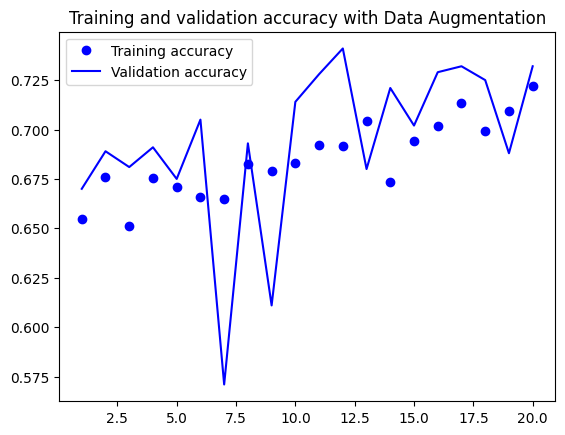

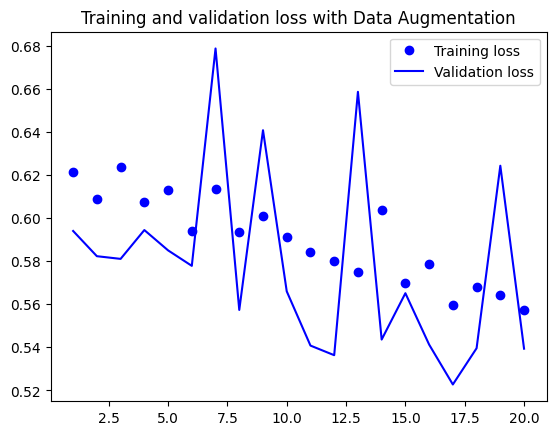

In [127]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy with Data Augmentation")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss with Data Augmentation")
plt.legend()
plt.show()

In [129]:
test_accuracy5 = keras.models.load_model("convnet_from_scratch_augmentation.keras")
test_loss, test_acc = test_accuracy5.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 7ms/step - loss: 0.5625 - accuracy: 0.7140
Test accuracy: 0.714


In [131]:
base_network = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
base_network.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [133]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = base_network.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_data)
val_features, val_labels = get_features_and_labels(validation_data)
test_features, test_labels = get_features_and_labels(test_data)


1/1 [==============================] - 0s 22ms/step


In [134]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]
history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 16.1027 - accuracy: 0.9260 - val_loss: 12.7167 - val_accuracy: 0.9330
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.3919 - accuracy: 0.9725 - val_loss: 6.5445 - val_accuracy: 0.9650
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 3.0348 - accuracy: 0.9840 - val_loss: 4.6410 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2783 - accuracy: 0.9910 - val_loss: 3.2990 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0712 - accuracy: 0.9920 - val_loss: 8.4112 - val_accuracy: 0.9620
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7337 - accuracy: 0.9960 - val_loss: 4.3656 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0709 - accuracy: 0.9910 - val_loss: 6.1072 - val_accuracy: 0.9730
Epoch 8/20
63/63 [

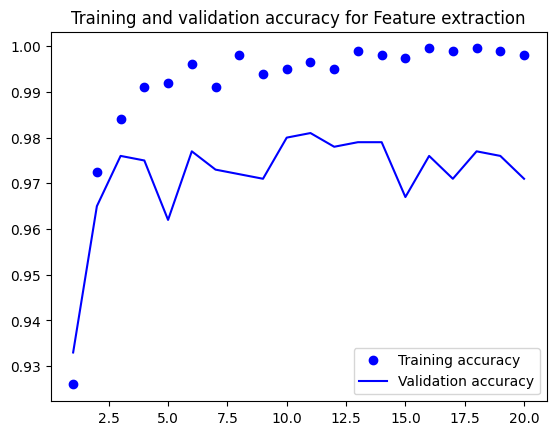

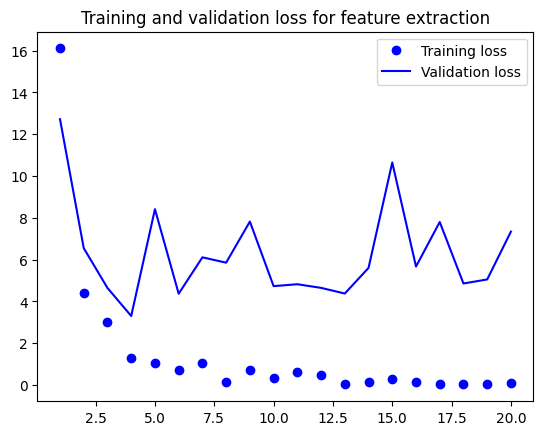

In [135]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for Feature extraction")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for feature extraction")
plt.legend()
plt.show()

### **Pre-training model with 1000 samples**

In [138]:
base_network = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False)
base_network.trainable = False
base_network.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing the layers**

In [140]:
base_network.trainable = True
for layer in base_network.layers[:-4]:
 layer.trainable = False

In [141]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.5),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = base_network(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [143]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 38ms/step - loss: 4.1170 - accuracy: 0.6760 - val_loss: 0.8846 - val_accuracy: 0.8860
Epoch 2/20
63/63 [==============================] - 2s 36ms/step - loss: 1.6074 - accuracy: 0.7335 - val_loss: 0.3446 - val_accuracy: 0.9310
Epoch 3/20
63/63 [==============================] - 2s 38ms/step - loss: 0.8316 - accuracy: 0.7670 - val_loss: 0.2110 - val_accuracy: 0.9440
Epoch 4/20
63/63 [==============================] - 2s 35ms/step - loss: 0.5923 - accuracy: 0.8045 - val_loss: 0.1853 - val_accuracy: 0.9530
Epoch 5/20
63/63 [==============================] - 2s 35ms/step - loss: 0.4361 - accuracy: 0.8400 - val_loss: 0.1361 - val_accuracy: 0.9650
Epoch 6/20
63/63 [==============================] - 2s 35ms/step - loss: 0.3879 - accuracy: 0.8440 - val_loss: 0.1214 - val_accuracy: 0.9680
Epoch 7/20
63/63 [==============================] - 2s 27ms/step - loss: 0.3339 - accuracy: 0.8595 - val_loss: 0.1393 - val_accuracy: 0.9600
Epoch 8/20
63

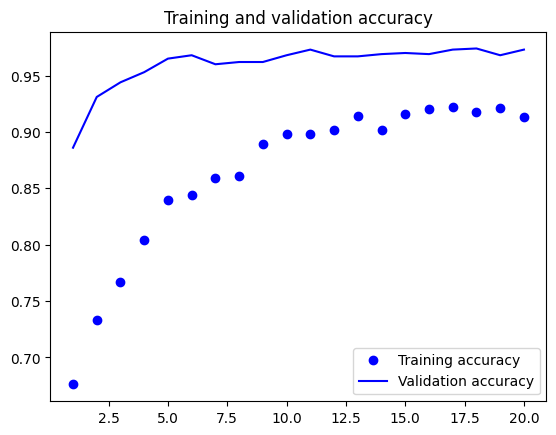

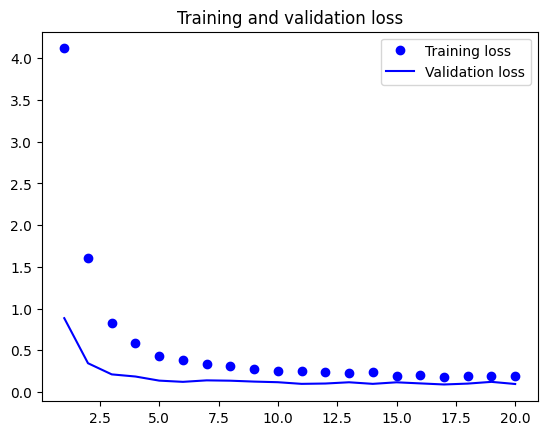

In [144]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating model with test set**

In [146]:
model_conv1 = keras.models.load_model("fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model_conv1.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.1571 - accuracy: 0.9720
Test accuracy: 0.972


### **Pre-training model with 2000 samples**

**Fine tuning the pre trained model by freezing the layers**

In [147]:
base_net  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
base_net  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

base_net.trainable = True
for layer in base_net.layers[:-4]:
    layer.trainable = False


In [148]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = base_net(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset2,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks)

Epoch 1/10
125/125 [==============================] - 5s 27ms/step - loss: 2.6094 - accuracy: 0.8048 - val_loss: 0.3052 - val_accuracy: 0.9520
Epoch 2/10
125/125 [==============================] - 3s 27ms/step - loss: 0.5177 - accuracy: 0.8988 - val_loss: 0.1779 - val_accuracy: 0.9660
Epoch 3/10
125/125 [==============================] - 3s 27ms/step - loss: 0.2886 - accuracy: 0.9295 - val_loss: 0.1222 - val_accuracy: 0.9700
Epoch 4/10
125/125 [==============================] - 3s 26ms/step - loss: 0.2025 - accuracy: 0.9435 - val_loss: 0.0942 - val_accuracy: 0.9760
Epoch 5/10
125/125 [==============================] - 3s 27ms/step - loss: 0.1528 - accuracy: 0.9490 - val_loss: 0.0761 - val_accuracy: 0.9770
Epoch 6/10
125/125 [==============================] - 3s 27ms/step - loss: 0.1183 - accuracy: 0.9555 - val_loss: 0.0705 - val_accuracy: 0.9820
Epoch 7/10
125/125 [==============================] - 3s 23ms/step - loss: 0.1214 - accuracy: 0.9613 - val_loss: 0.0766 - val_accuracy: 0.9800

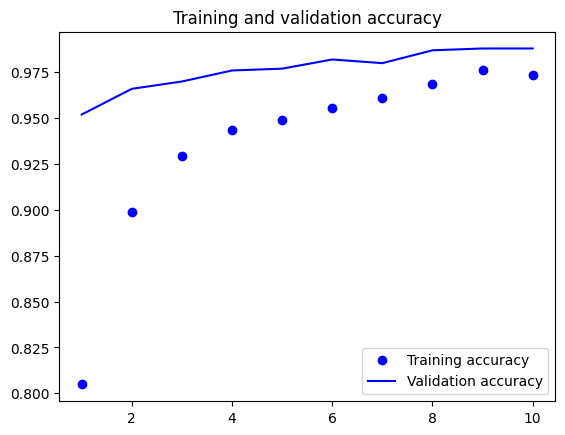

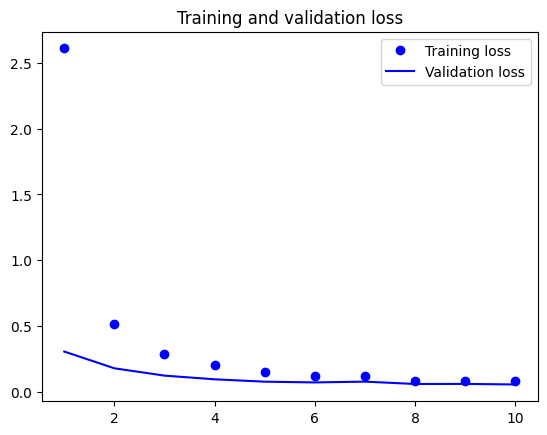

In [149]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating model with test set**

In [150]:
model_conv2 = keras.models.load_model("fine_tuning2.keras", safe_mode = False)
test_loss, test_acc = model_conv2.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 17ms/step - loss: 0.0289 - accuracy: 0.9890
Test accuracy: 0.989


### **Pre-training model with 5000 samples**

**Fine-tuning the pre trained model**

In [151]:
base_net  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
base_net  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

base_net.trainable = True
for layer in base_net.layers[:-4]:
    layer.trainable = False


In [153]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = base_net(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset3,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 9s 22ms/step - loss: 1.1521 - accuracy: 0.8702 - val_loss: 0.1129 - val_accuracy: 0.9660
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2173 - accuracy: 0.9300 - val_loss: 0.0776 - val_accuracy: 0.9820
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1393 - accuracy: 0.9496 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 4/10
313/313 [==============================] - 6s 19ms/step - loss: 0.1148 - accuracy: 0.9622 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 5/10
313/313 [==============================] - 7s 21ms/step - loss: 0.1025 - accuracy: 0.9657 - val_loss: 0.0205 - val_accuracy: 0.9920
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0922 - accuracy: 0.9707 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0786 - accuracy: 0.9721 - val_loss: 0.0206 - val_accuracy: 0.9920

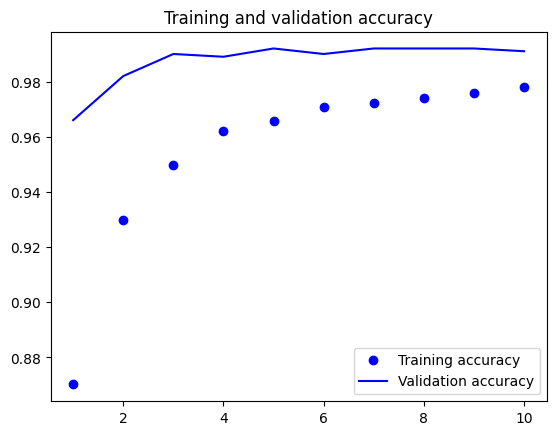

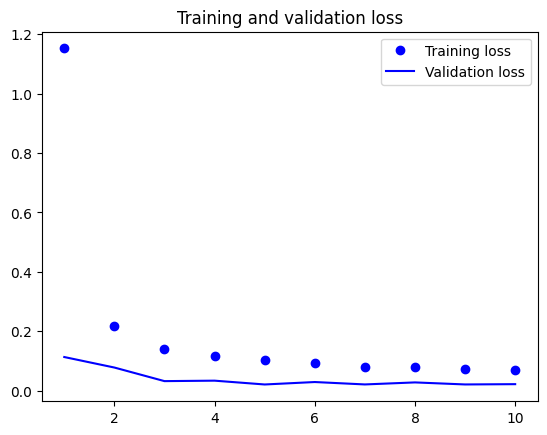

In [154]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating model with test set**

In [155]:
model_conv3 = keras.models.load_model("fine_tuning3.keras", safe_mode = False)
test_loss, test_acc = model_conv3.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 18ms/step - loss: 0.0617 - accuracy: 0.9870
Test accuracy: 0.987
